In [1]:
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from statsmodels.formula.api import ols

sns.set(style="whitegrid")

In [2]:
# IMPORT CSV FILE
df_old = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df_old.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

## Questions for QChat10 (Columns A1 - A10)

A1	 Does your child look at you when you call his/her name?

A2	How easy is it for you to get eye contact with your child?

A3	Does your child point to indicate that s/he wants something?
    (e.g. a toy that is out of reach)
    
A4	Does your child point to share interest with you? (e.g. 
    pointing at an interesing sight)
    
A5	Does your child pretend? (e.g. care for dolls, talk on a toy 
    phone)
    
A6	Does your child follow where you’re looking?

A7	If you or someone else in the family is visibly upset, does 
    your child show signs of wanting to comfort them? (e.g. 
    stroking hair, hugging them)
    
A8	Would you describe your child’s first words as: (0:My child 
    doesn't speak 1:Very typical)
    
A9	Does your child use simple gestures? (e.g. wave goodbye)

A10	Does your child stare at nothing with no apparent purpose?


In [4]:
# RENAME COLUMNS TO MAKE ANALYSES EASIER
df = df_old.rename(columns={'Age_Mons': 'Age', 'Qchat-10-Score':'qchat_score', 'Family_mem_with_ASD':'family_asd', 'Class/ASD Traits ':'asd_traits'})
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
# SELECT ONLY "YES" VALUES FOR TARGET VARIABLE
df = df[df['asd_traits'] != 'No']
df.shape

(728, 19)

In [6]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,qchat_score,Sex,Ethnicity,Jaundice,family_asd,Who completed the test,asd_traits
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes


In [7]:
# CREATE DUMMY VARIABLES OF CATEGORICAL VARIABLES FOR REGRESSION
df = pd.get_dummies(df, columns=['Ethnicity','Jaundice','Sex','family_asd','asd_traits'], drop_first=True)
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'qchat_score', 'Who completed the test', 'Ethnicity_Latino',
       'Ethnicity_Native Indian', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_asian', 'Ethnicity_black',
       'Ethnicity_middle eastern', 'Ethnicity_mixed', 'Ethnicity_south asian',
       'Jaundice_yes', 'Sex_m', 'family_asd_yes'],
      dtype='object')

In [8]:
# DEFINE FEATURES AND TARGET VARIABLE
features = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10']
df_features = df[features]
target = df['Age']

In [9]:
df_features.shape

(728, 10)

In [10]:
mlr_model = ols(formula='Age~A1+A2+A3+A4+A5+A6+A7+A8+A9+A10', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.014
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           1.48e-10
Time:                        13:22:10   Log-Likelihood:                -2464.6
No. Observations:                 728   AIC:                             4951.
Df Residuals:                     717   BIC:                             5002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5455      1.056     29.861      0.000      29.471      33.620
A1            -0.1171      0.654     -0.179      0.858      -1.402       1.168
A2            -0.4311      0.592     -0.728      0.467      -1.593       0.731
A3            -2.4094      0.617     -3.903      0.000      -3.622      -1.197
A4            -2.0673      0.657     -3.145      0.002      -3.358      -0.777
A5            -0.1663      0.619     -0.269      0.788      -1.381       1.048
A6             1.2067      0.653      1.848      0.065      -0.075       2.488
A7            -1.3285      0.721     -1.843      0.066      -2.743       0.086
A8             0.7764      0.557      1.395      0.163      -0.316       1.869
A9            -1.3380      0.608     -2.202      0.028      -2.531      -0.145
A10            0.7232      0.570      1.268      0.205      -0.396       1.843
==============================================================================
Omnibus:                       56.568   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.591
Skew:                          -0.525   Prob(JB):                     1.26e-10
Kurtosis:                       2.367   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# SPLIT DATA INTO TRAINING AND TESTING SET
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=22,test_size=0.2)
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (582, 10) Target:  (582,)
Training set - Features:  (146, 10) Target:  (146,)


In [12]:
# SCALE DATA AND TRANSFORM TRAINING/TESTING DATA
scaler = StandardScaler()

scaler.fit(X_train)

X_train = pd.DataFrame(data=scaler.transform(X_train), columns=df_features.columns)

X_test = pd.DataFrame(data=scaler.transform(X_test), columns=df_features.columns)

In [13]:
price_std = target.std()
# INSTANTIATE LINEAR REGRESSION OBJECT AND FIT OBJECT TO DATA, CALCULATE RMSE AND ZSCORE
lm = LinearRegression()

lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error  Z:', train_rmse/price_std )
print('Training Root Mean Squared Error:' , train_rmse)

Mean Absolute Error  Z: 0.942683052084798
Training Root Mean Squared Error: 7.062576891045197


### Evaluate on the test set

In [14]:
# USE MODEL TO PREDICT TESTING DATA AND CALCULATE RMSE
y_pred = lm.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 7.58025311240337
Training:  7 vs. Testing:  7


***Plot the residuals after fitting a linear model***

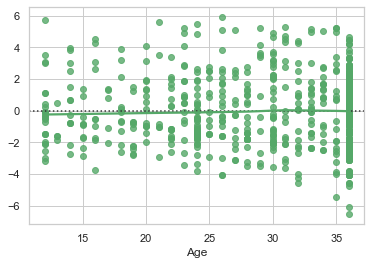

In [15]:
# PLOT RESIDUALS
sns.residplot( y_train, y_train_pred,lowess=True, color="g")

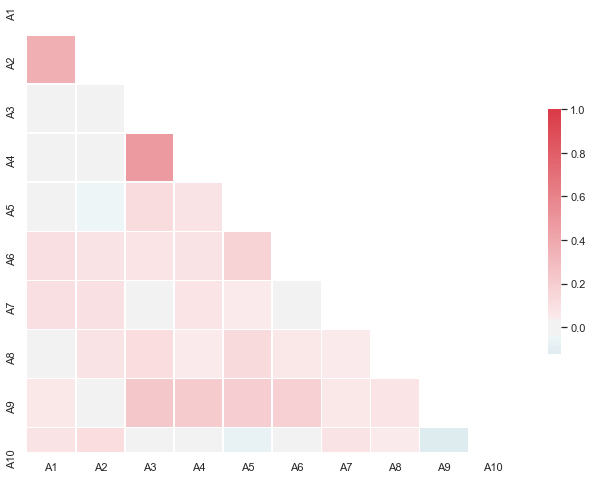

In [16]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Interaction of df_features

In [17]:
# CREATE INTERACTIONS OF TWO FEATURES
import itertools
combin =[(x, y) for x, y in itertools.product(df_features.columns,df_features.columns) if x != y]
df_comb = pd.concat([pd.DataFrame({''.join(i):df.loc[:,i].prod(axis=1)}) for i in combin],axis=1)

df_comb.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A1,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A1,A3A2,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A1,A4A2,A4A3,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A1,A5A2,A5A3,A5A4,A5A6,A5A7,A5A8,A5A9,A5A10,A6A1,A6A2,A6A3,A6A4,A6A5,A6A7,A6A8,A6A9,A6A10,A7A1,A7A2,A7A3,A7A4,A7A5,A7A6,A7A8,A7A9,A7A10,A8A1,A8A2,A8A3,A8A4,A8A5,A8A6,A8A7,A8A9,A8A10,A9A1,A9A2,A9A3,A9A4,A9A5,A9A6,A9A7,A9A8,A9A10,A10A1,A10A2,A10A3,A10A4,A10A5,A10A6,A10A7,A10A8,A10A9
1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
5,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [18]:
df_comb.shape

(728, 90)

In [19]:
# DROP COLUMNS THAT HAVE SAME VALUES FORWARDS AND BACKWARDS (EX. A1A2 == A2A1)
df_comb.drop(columns=['A2A1','A3A1','A3A2','A4A1','A4A2','A4A3','A5A1','A5A2','A5A3','A5A4','A6A1','A6A2','A6A3','A6A4','A6A5','A7A1','A7A2','A7A3','A7A4','A7A5','A7A6','A8A1','A8A2','A8A3','A8A4','A8A5','A8A6','A8A7','A9A1','A9A2','A9A3','A9A4','A9A5','A9A6','A9A7','A9A8','A10A1','A10A2','A10A3','A10A4','A10A5','A10A6','A10A7','A10A8','A10A9'],inplace=True)
df_comb.shape

(728, 45)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df_comb, target, random_state=22,test_size=0.2)


In [21]:
scaler2 = StandardScaler()
# fit the scaler to the training data
scaler2.fit(X_train)

#transform the training data
X_train = pd.DataFrame(data=scaler2.transform(X_train), columns=df_comb.columns)

#transform the testing dat
X_test = pd.DataFrame(data=scaler2.transform(X_test), columns=df_comb.columns)

In [22]:
X_test.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10
0,-1.042124,1.273429,1.017332,-1.049325,0.840681,0.791011,1.136371,-1.031421,-0.969536,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,1.071262,-0.817081,1.176965,1.156438,1.382027,-0.837708,-0.690766,-1.013841,0.914310,0.864724,1.164592,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,1.034976,-1.152389,-0.982963,0.989743,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
1,0.959579,-0.785281,1.017332,0.952994,0.840681,-1.264205,1.136371,-1.031421,1.031421,-0.685344,1.181127,1.164592,1.027880,-1.027880,1.259630,-0.846649,1.193734,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,0.986347,0.914310,-1.156438,1.164592,-1.031421,1.152389,0.837708,-1.210827,1.074968,-1.074968,1.124541,-1.330950,1.034976,-1.152389,1.017332,-1.010363,-1.160506,-1.078688,-0.876925,1.232672,-0.837708
2,0.959579,1.273429,1.017332,0.952994,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,1.181127,1.164592,1.027880,0.972876,1.259630,1.181127,1.193734,1.071262,1.223868,1.176965,1.156438,1.382027,1.193734,1.447669,0.986347,0.914310,0.864724,1.164592,0.969536,1.152389,0.837708,0.825882,1.074968,0.930261,1.124541,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
3,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,1.181127,-0.858670,1.027880,0.972876,-0.793884,-0.846649,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,0.914310,0.864724,-0.858670,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,-0.966206,-1.152389,-0.982963,-1.010363,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
4,0.959579,1.273429,1.017332,0.952994,-1.189512,0.791011,1.136371,0.969536,-0.969536,1.459120,1.181127,1.164592,-0.972876,0.972876,1.259630,1.181127,-0.837708,1.071262,1.223868,-0.849643,1.156438,1.382027,1.193734,-0.690766,0.986347,-1.093721,0.864724,1.164592,0.969536,-0.867763,-1.193734,0.825882,1.074968,0.930261,-0.889252,-1.330950,-0.966206,-1.152389,-0.982963,0.989743,0.861693,-1.078688,1.140349,-0.811246,-0.837708


In [23]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

# print("R^2: ", lm_2.score(X_train, y_train))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 6.849816788042438


In [24]:
age_std = target.std()
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)

print('Mean Absolute Error  Z:', test_rmse/age_std )
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
# TRAINING ERROR SHOULD BE LOWER THAN TESTING ERROR

Testing Root Mean Squared Error: 7.803763659694594
Mean Absolute Error  Z: 1.0416135438888852
Training:  6 vs. Testing:  7


In [25]:
df_comb.shape

(728, 45)

In [26]:
df_comb.columns

Index(['A1A2', 'A1A3', 'A1A4', 'A1A5', 'A1A6', 'A1A7', 'A1A8', 'A1A9', 'A1A10',
       'A2A3', 'A2A4', 'A2A5', 'A2A6', 'A2A7', 'A2A8', 'A2A9', 'A2A10', 'A3A4',
       'A3A5', 'A3A6', 'A3A7', 'A3A8', 'A3A9', 'A3A10', 'A4A5', 'A4A6', 'A4A7',
       'A4A8', 'A4A9', 'A4A10', 'A5A6', 'A5A7', 'A5A8', 'A5A9', 'A5A10',
       'A6A7', 'A6A8', 'A6A9', 'A6A10', 'A7A8', 'A7A9', 'A7A10', 'A8A9',
       'A8A10', 'A9A10'],
      dtype='object')

In [27]:

    n = 0
    while n < 9:
        m = n
        while m < 9:
            print(df_features.iloc[:,n]*df_features.iloc[:,m+1])
            m += 1
        n += 1



1       1
2       0
3       1
4       1
5       1
       ..
1046    0
1047    1
1050    0
1051    0
1053    1
Length: 728, dtype: int64
1       0
2       0
3       1
4       0
5       0
       ..
1046    0
1047    0
1050    0
1051    1
1053    0
Length: 728, dtype: int64
1       0
2       0
3       1
4       1
5       0
       ..
1046    0
1047    0
1050    0
1051    1
1053    0
Length: 728, dtype: int64
1       0
2       0
3       1
4       1
5       1
       ..
1046    0
1047    1
1050    0
1051    1
1053    1
Length: 728, dtype: int64
1       1
2       0
3       1
4       1
5       1
       ..
1046    0
1047    1
1050    0
1051    1
1053    1
Length: 728, dtype: int64
1       1
2       1
3       1
4       1
5       1
       ..
1046    0
1047    1
1050    0
1051    1
1053    0
Length: 728, dtype: int64
1       0
2       1
3       1
4       1
5       1
       ..
1046    0
1047    0
1050    0
1051    1
1053    1
Length: 728, dtype: int64
1       0
2       0
3       1
4       1
5       

In [28]:
df_comb.shape

(728, 45)

In [29]:
df_comb['Age'] =df['Age'].apply(lambda x: x)

In [30]:
df_comb.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10,Age
1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,36
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,24
4,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20
5,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21


In [31]:
df_comb.columns

Index(['A1A2', 'A1A3', 'A1A4', 'A1A5', 'A1A6', 'A1A7', 'A1A8', 'A1A9', 'A1A10',
       'A2A3', 'A2A4', 'A2A5', 'A2A6', 'A2A7', 'A2A8', 'A2A9', 'A2A10', 'A3A4',
       'A3A5', 'A3A6', 'A3A7', 'A3A8', 'A3A9', 'A3A10', 'A4A5', 'A4A6', 'A4A7',
       'A4A8', 'A4A9', 'A4A10', 'A5A6', 'A5A7', 'A5A8', 'A5A9', 'A5A10',
       'A6A7', 'A6A8', 'A6A9', 'A6A10', 'A7A8', 'A7A9', 'A7A10', 'A8A9',
       'A8A10', 'A9A10', 'Age'],
      dtype='object')

In [32]:
df_comb.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10,Age
1,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,36
2,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,36
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,24
4,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,20
5,1,0,0,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,21


In [33]:

mlr_1 = ols(formula='Age~A1A2+A1A3+ A1A4+ A1A5+ A1A6+ A1A7+ A1A8+ A1A9+ A1A10+A2A3+ A2A4+ A2A5+ A2A6+ A2A7+ A2A8+ A2A9+ A2A10+ A3A4+A3A5+A3A6+A3A7+ A3A8+ A3A9+ A3A10+ A4A5+ A4A6+ A4A7+A4A8+ A4A9+ A4A10+ A5A6+ A5A7+ A5A8+ A5A9+ A5A10+A6A7+ A6A8+ A6A9+ A6A10+ A7A8+ A7A9+ A7A10+ A8A9+A8A10+ A9A10',data=df_comb).fit()
mlr_1.summary()

# 90 FEATURES
# ['A1A2'+ 'A1A3'+ 'A1A4'+ 'A1A5'+ 'A1A6'+ 'A1A7'+ 'A1A8'+ 'A1A9'+ 'A1A10'+
#        'A2A3'+ 'A2A4'+ 'A2A5'+ 'A2A6'+ 'A2A7'+ 'A2A8'+ 'A2A9'+ 'A2A10'+ 'A3A4'+
#        'A3A5'+ 'A3A6'+ 'A3A7'+ 'A3A8'+ 'A3A9'+ 'A3A10'+ 'A4A5'+ 'A4A6'+ 'A4A7'+
#        'A4A8'+ 'A4A9'+ 'A4A10'+ 'A5A6'+ 'A5A7'+ 'A5A8'+ 'A5A9'+ 'A5A10'+
#        'A6A7'+ 'A6A8'+ 'A6A9'+ 'A6A10'+ 'A7A8'+ 'A7A9'+ 'A7A10'+ 'A8A9'+
#        'A8A10'+ 'A9A10'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     2.284
Date:                Fri, 19 Jun 2020   Prob (F-statistic):           6.80e-06
Time:                        13:22:11   Log-Likelihood:                -2447.5
No. Observations:                 728   AIC:                             4987.
Df Residuals:                     682   BIC:                             5198.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.8824      0.686     43.548      0.000      28.535      31.230
A1A2           1.2554      1.226      1.024      0.306      -1.151       3.662
A1A3           0.1252      1.490      0.084      0.933      -2.800       3.051
A1A4          -1.1355      1.483     -0.766      0.444      -4.047       1.776
A1A5          -0.8023      1.359     -0.591      0.555      -3.470       1.865
A1A6           1.4678      1.349      1.088      0.277      -1.181       4.117
A1A7           0.1964      1.393      0.141      0.888      -2.539       2.932
A1A8          -0.5247      1.316     -0.399      0.690      -3.108       2.059
A1A9           0.4827      1.350      0.358      0.721      -2.168       3.134
A1A10         -0.5730      1.261     -0.455      0.650      -3.048       1.902
A2A3           1.0930      1.388      0.787      0.431      -1.632       3.818
A2A4          -0.3868      1.363     -0.284      0.777      -3.062       2.288
A2A5           1.6671      1.293      1.290      0.198      -0.871       4.205
A2A6          -1.7006      1.294     -1.314      0.189      -4.242       0.841
A2A7          -0.8425      1.350     -0.624      0.533      -3.493       1.808
A2A8          -0.9077      1.206     -0.753      0.452      -3.276       1.460
A2A9          -0.1072      1.319     -0.081      0.935      -2.697       2.483
A2A10         -0.8793      1.202     -0.731      0.465      -3.240       1.482
A3A4           0.3337      1.276      0.261      0.794      -2.172       2.840
A3A5          -2.9643      1.341     -2.210      0.027      -5.598      -0.331
A3A6           0.6064      1.452      0.418      0.676      -2.244       3.457
A3A7           0.2348      1.593      0.147      0.883      -2.893       3.363
A3A8           0.8469      1.279      0.662      0.508      -1.665       3.358
A3A9          -2.0598      1.345     -1.532      0.126      -4.700       0.580
A3A10         -1.2488      1.294     -0.965      0.335      -3.790       1.293
A4A5           0.7008      1.333      0.526      0.599      -1.917       3.318
A4A6          -1.2000      1.395     -0.860      0.390      -3.939       1.539
A4A7          -0.5241      1.422     -0.369      0.713      -3.316       2.268
A4A8          -1.4274      1.312     -1.088      0.277      -4.003       1.148
A4A9          -1.2456      1.261     -0.988      0.324      -3.722       1.230
A4A10          2.2272      1.275      1.747      0.081      -0.276       4.731
A5A6          -1.0869      1.306     -0.833      0.405      -3.650       1.476
A5A7           2.0226      1.419      1.425      0.155      -0.764       4.809
A5A8          -0.4913      1.170     -0.420      0.675      -2.788       1.805
A5A9          -0.3874      1.247     -0.311      0.756      -2.835       2.060
A5A10         -0.6114      1.244     -0.492      0.623      -3.054       1.831
A6

## F test

In [34]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=15)
#run regression on x train and y train and return top 15 features
selector.fit(X_train, y_train)

SelectKBest(k=15, score_func=<function f_regression at 0x1a1f9eca60>)

In [35]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [36]:
list(removed_columns)

['A1A2',
 'A1A5',
 'A1A6',
 'A1A7',
 'A1A8',
 'A1A9',
 'A1A10',
 'A2A5',
 'A2A6',
 'A2A7',
 'A2A8',
 'A2A9',
 'A2A10',
 'A3A10',
 'A4A6',
 'A4A8',
 'A4A10',
 'A5A6',
 'A5A7',
 'A5A8',
 'A5A10',
 'A6A7',
 'A6A8',
 'A6A9',
 'A6A10',
 'A7A8',
 'A7A10',
 'A8A9',
 'A8A10',
 'A9A10']

In [37]:
list(selected_columns)

['A1A3',
 'A1A4',
 'A2A3',
 'A2A4',
 'A3A4',
 'A3A5',
 'A3A6',
 'A3A7',
 'A3A8',
 'A3A9',
 'A4A5',
 'A4A7',
 'A4A9',
 'A5A9',
 'A7A9']

In [38]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest = lm_kbest.fit(X_train[selected_columns], y_train)

y_train_kbest = lm_kbest.predict(X_train[selected_columns])


trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(X_test[selected_columns])

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))


print('Testing Root Mean Squared Error:' , testK_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse)

Training Root Mean Squared Error: 7.100958846201508
Testing Root Mean Squared Error: 7.389170245544897
Original:  7.803763659694594 vs. KBest:  7.389170245544897


## Wrapper RFECV

In [39]:
from sklearn.feature_selection import RFECV

In [40]:
ols = linear_model.LinearRegression()

In [41]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)



RFECV(cv=5,
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
      step=1, verbose=0)

In [42]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]



In [43]:
list(removed_rfe)

['A1A2',
 'A1A3',
 'A1A4',
 'A1A5',
 'A1A6',
 'A1A7',
 'A1A8',
 'A1A9',
 'A1A10',
 'A2A3',
 'A2A4',
 'A2A5',
 'A2A6',
 'A2A7',
 'A2A8',
 'A2A9',
 'A2A10',
 'A3A4',
 'A3A6',
 'A3A7',
 'A3A8',
 'A3A9',
 'A3A10',
 'A4A5',
 'A4A6',
 'A4A7',
 'A4A8',
 'A4A10',
 'A5A6',
 'A5A7',
 'A5A8',
 'A5A9',
 'A5A10',
 'A6A7',
 'A6A8',
 'A6A10',
 'A7A8',
 'A7A10',
 'A8A9',
 'A9A10']

In [44]:
len(list(selected_rfe))

5

In [45]:
#instantiate a linear regression object
lm_rfe = LinearRegression()

#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train[selected_rfe], y_train)

y_rfe = lm_rfe.predict(X_train[selected_rfe])


trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test[selected_rfe])

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)


print('Original: ', test_rmse, "vs. KBest: ", testK_rmse, "vs. RFE: ", testRFE_rmse)

Training Root Mean Squared Error: 7.019695369403552
Testing Root Mean Squared Error: 7.499027797762223
Original:  7.803763659694594 vs. KBest:  7.389170245544897 vs. RFE:  7.499027797762223


## Embedded Methods

In [46]:
X_train.head()

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10
0,0.959579,-0.785281,-0.982963,0.952994,0.840681,0.791011,1.136371,0.969536,-0.969536,-0.685344,-0.846649,1.164592,1.027880,0.972876,1.259630,1.181127,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,-1.093721,-1.156438,-0.858670,-1.031421,-0.867763,0.837708,0.825882,1.074968,0.930261,-0.889252,0.751343,1.034976,0.867763,-0.982963,0.989743,0.861693,-1.078688,1.140349,-0.811246,-0.837708
1,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,0.986347,0.914310,-1.156438,1.164592,0.969536,-0.867763,0.837708,-1.210827,1.074968,0.930261,-0.889252,-1.330950,1.034976,0.867763,-0.982963,-1.010363,-1.160506,-1.078688,1.140349,-0.811246,-0.837708
2,0.959579,1.273429,-0.982963,-1.049325,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,-0.846649,-0.858670,1.027880,0.972876,1.259630,1.181127,1.193734,-0.933479,-0.817081,1.176965,1.156438,1.382027,1.193734,1.447669,-1.013841,-1.093721,-1.156438,-0.858670,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
3,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,1.071262,1.223868,1.176965,-0.864724,-0.723575,1.193734,-0.690766,0.986347,0.914310,-1.156438,-0.858670,0.969536,-0.867763,0.837708,-1.210827,-0.930261,0.930261,-0.889252,-1.330950,-0.966206,0.867763,-0.982963,-1.010363,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
4,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,1.181127,-0.858670,1.027880,-1.027880,-0.793884,1.181127,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,0.914310,-1.156438,-0.858670,0.969536,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,-1.330950,-0.966206,0.867763,-0.982963,-1.010363,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708


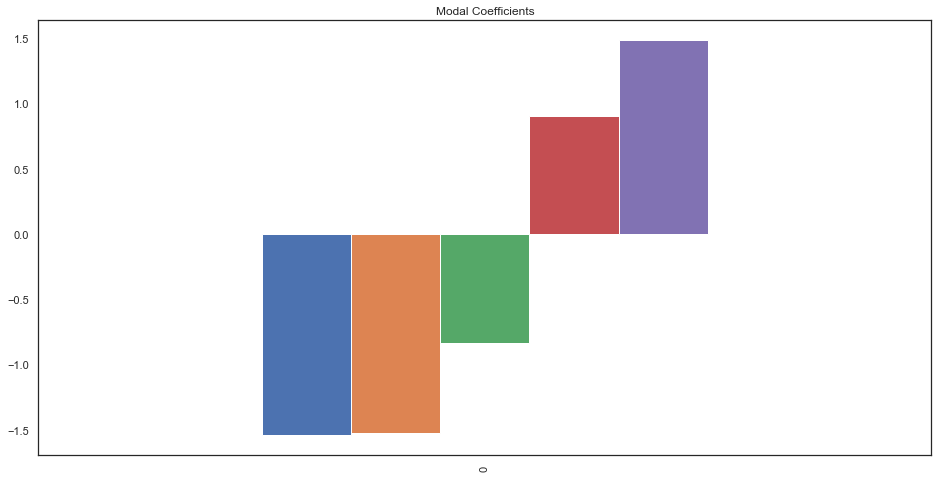

In [47]:
coef = pd.DataFrame(data=lm_rfe.coef_ ).T
coef.columns = selected_rfe

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

In [48]:
coef.T

,0
A3A5,-1.523014
A4A9,-1.544419
A6A9,1.486184
A7A9,-0.834922
A8A10,0.906446


In [49]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )



Training Error: 5.763549537524202
Testing Error: 7.750588015797766


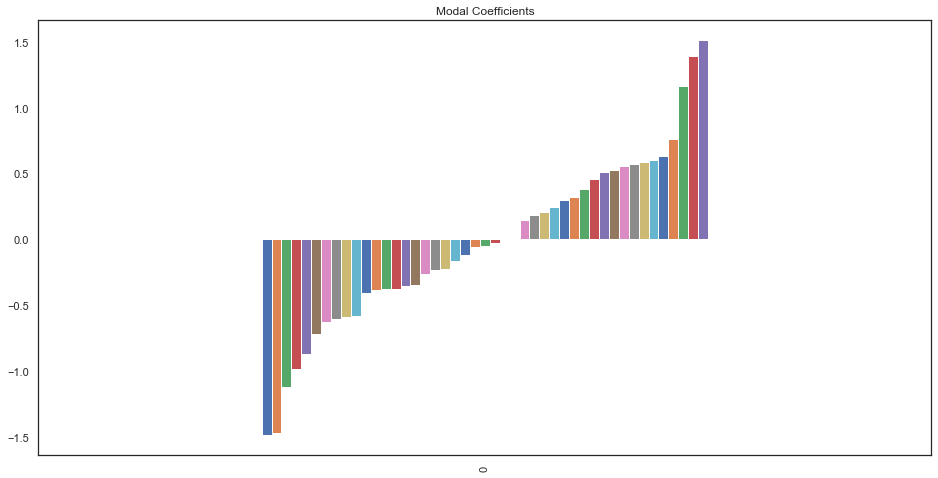

In [50]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [51]:
lasso_coef01.T

,0
A3A5,-1.490736
A7A9,-1.474628
A4A8,-1.119361
A3A9,-0.988543
A2A6,-0.868563
A4A9,-0.718086
A4A6,-0.627901
A5A9,-0.608358
A3A10,-0.587920
A7A10,-0.585658


In [52]:
## training the model
from sklearn.linear_model import Lasso

lasso1 = Lasso(alpha=.1, normalize=False)

lasso1.fit(X_train,y_train)

y_train_lasso1 = lasso1.predict(X_train)
y_pred_lasso1 = lasso1.predict(X_test)

train_rmse_lasso1 = metrics.mean_absolute_error(y_train, y_train_lasso1)
test_rmse_lasso1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso1))
print('Training Error: '+ str(train_rmse_lasso1) )
print('Testing Error: '+ str(test_rmse_lasso1) )




Training Error: 5.869334591008907
Testing Error: 7.571163336294936


In [53]:
lasso_coef1 = pd.DataFrame(data=lasso1.coef_).T
lasso_coef1.columns = X_train.columns

In [54]:
lasso_coef1.T

,0
A1A2,0.000000
A1A3,-0.000000
A1A4,-0.198377
A1A5,0.000000
A1A6,0.159383
A1A7,0.000000
A1A8,-0.000000
A1A9,-0.000000
A1A10,-0.000000
A2A3,-0.000000


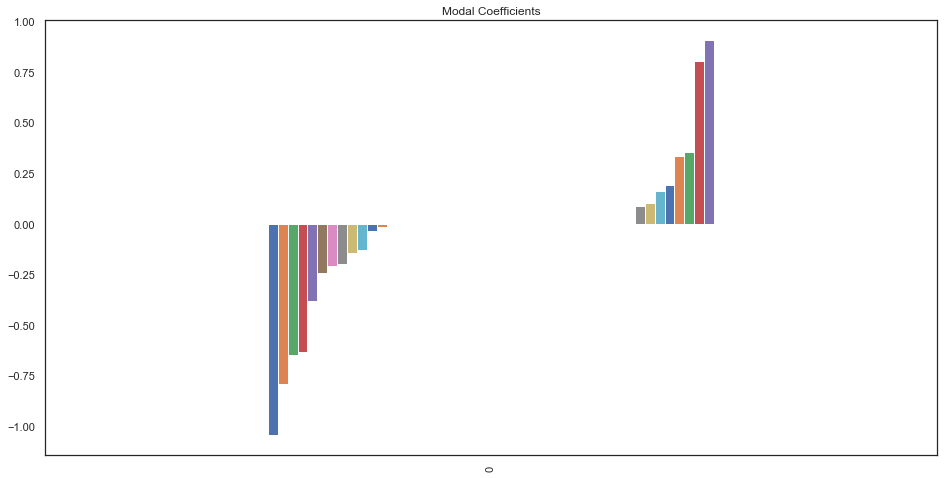

In [55]:
lasso_coef1 = lasso_coef1.T.sort_values(by=0).T
lasso_coef1.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

## Filter

In [56]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10
A1A2,NaN,0.349944,0.427252,0.400883,0.485071,0.548655,0.414455,0.397879,0.434843,0.502755,0.589251,0.615200,0.685825,0.745486,0.528724,0.610174,0.594242,0.033871,0.068061,0.111308,0.155477,0.129458,0.063242,0.155361,0.064786,0.137877,0.157340,0.114173,0.046897,0.137886,0.062521,0.097131,0.071953,0.038394,0.091432,0.188568,0.108102,0.105295,0.186462,0.102761,0.125980,0.138289,0.106039,0.103598,0.140097
A1A3,NaN,NaN,0.622001,0.422559,0.416003,0.395799,0.378831,0.471161,0.293262,0.713439,0.382380,0.263256,0.248070,0.268572,0.262773,0.296306,0.197277,0.663957,0.628986,0.680512,0.686496,0.549013,0.642798,0.584634,0.328818,0.348634,0.328728,0.306197,0.364991,0.290403,0.169200,0.151442,0.184494,0.241092,0.156494,0.148073,0.175656,0.259830,0.119630,0.140479,0.211718,0.117834,0.189059,0.136549,0.204463
A1A4,NaN,NaN,NaN,0.482556,0.519342,0.530307,0.375488,0.519757,0.374273,0.402408,0.638305,0.289432,0.315845,0.337419,0.243021,0.303777,0.223854,0.439786,0.312162,0.348936,0.351770,0.280197,0.335564,0.320556,0.515825,0.595068,0.606861,0.400693,0.519757,0.487045,0.160152,0.160808,0.105580,0.218336,0.157168,0.223260,0.143846,0.235040,0.147515,0.113602,0.242348,0.152962,0.178001,0.087701,0.202908
A1A5,NaN,NaN,NaN,NaN,0.539898,0.504771,0.450150,0.556123,0.352580,0.247348,0.248740,0.609481,0.266336,0.256804,0.233762,0.283622,0.148354,0.117121,0.378436,0.182192,0.156528,0.175228,0.190288,0.158013,0.450074,0.171845,0.128570,0.129182,0.191265,0.125007,0.536567,0.544291,0.389818,0.513926,0.445612,0.165140,0.156566,0.236401,0.124701,0.109602,0.215434,0.055003,0.224962,0.112112,0.204266
A1A6,NaN,NaN,NaN,NaN,NaN,0.575287,0.430312,0.559979,0.431174,0.254493,0.301499,0.298402,0.566626,0.312759,0.216117,0.322719,0.250723,0.078451,0.124468,0.318391,0.113570,0.108837,0.158601,0.118224,0.126682,0.394124,0.133195,0.100785,0.148162,0.109384,0.394129,0.108523,0.082568,0.176241,0.122377,0.523284,0.316640,0.433227,0.414678,0.060995,0.192617,0.095224,0.132044,0.068836,0.165688
A1A7,NaN,NaN,NaN,NaN,NaN,NaN,0.425510,0.533226,0.491340,0.284642,0.333156,0.300546,0.324444,0.565780,0.214632,0.304514,0.253739,0.044617,0.069744,0.085239,0.270041,0.066741,0.067225,0.153728,0.081507,0.134777,0.329494,0.064769,0.102202,0.158512,0.054727,0.332054,0.027740,0.099719,0.098947,0.449834,0.057603,0.133972,0.148870,0.248296,0.389540,0.357454,0.102399,0.078725,0.174829
A1A8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430309,0.359985,0.303311,0.273625,0.302838,0.266811,0.259999,0.667369,0.287676,0.212955,0.130079,0.193127,0.179127,0.163365,0.457501,0.128498,0.184861,0.133427,0.143681,0.109728,0.499109,0.132216,0.118236,0.145985,0.134045,0.556922,0.200323,0.173295,0.134541,0.605713,0.154722,0.139864,0.607649,0.169781,0.113954,0.577176,0.525326,0.177764
A1A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.313972,0.281079,0.263125,0.282978,0.289758,0.260541,0.219009,0.618679,0.148685,0.181335,0.230835,0.259382,0.199082,0.144113,0.400118,0.169780,0.226509,0.231952,0.190056,0.157768,0.470284,0.125948,0.221480,0.193611,0.178039,0.532055,0.155959,0.223703,0.152428,0.589430,0.114005,0.126896,0.610670,0.073509,0.434078,0.076791,0.469960
A1A10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.212900,0.224889,0.190038,0.267420,0.262243,0.183418,0.190031,0.654502,0.032331,0.049842,0.054161,0.106669,0.073064,0.025921,0.425739,0.041686,0.058006,0.101798,0.043960,0.011277,0.499140,0.015985,0.030464,0.042573,0.026368,0.515627,0.119933,0.060858,0.021767,0.608097,0.072522,0.070671,0.629871,0.051409,0.443217,0.521802
A2A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652575,0.485037,0.505406,0.519314,0.500089,0.525557,0.406436,0.579061,0.522924,0.605008,0.643613,0.574762,0.533683,0.558786,0.270638,0.323263,0.331979,0.350846,0.295825,0.283622,0.139980,0.153263,0.219524,0.164681,0.132568,0.177338,0.230027,0.207652,0.

In [57]:
len(X_train.columns)

45

In [58]:
# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#if you change inplace to True it will go through and drop all of those columns from the dataset
X_train.drop(columns=to_drop, inplace=False)
X_test.drop(columns=to_drop, inplace=False)

,A1A2,A1A3,A1A4,A1A5,A1A6,A1A7,A1A8,A1A9,A1A10,A2A3,A2A4,A2A5,A2A6,A2A7,A2A8,A2A9,A2A10,A3A4,A3A5,A3A6,A3A7,A3A8,A3A9,A3A10,A4A5,A4A6,A4A7,A4A8,A4A9,A4A10,A5A6,A5A7,A5A8,A5A9,A5A10,A6A7,A6A8,A6A9,A6A10,A7A8,A7A9,A7A10,A8A9,A8A10,A9A10
0,-1.042124,1.273429,1.017332,-1.049325,0.840681,0.791011,1.136371,-1.031421,-0.969536,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,1.071262,-0.817081,1.176965,1.156438,1.382027,-0.837708,-0.690766,-1.013841,0.914310,0.864724,1.164592,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,1.034976,-1.152389,-0.982963,0.989743,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
1,0.959579,-0.785281,1.017332,0.952994,0.840681,-1.264205,1.136371,-1.031421,1.031421,-0.685344,1.181127,1.164592,1.027880,-1.027880,1.259630,-0.846649,1.193734,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,0.986347,0.914310,-1.156438,1.164592,-1.031421,1.152389,0.837708,-1.210827,1.074968,-1.074968,1.124541,-1.330950,1.034976,-1.152389,1.017332,-1.010363,-1.160506,-1.078688,-0.876925,1.232672,-0.837708
2,0.959579,1.273429,1.017332,0.952994,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,1.181127,1.164592,1.027880,0.972876,1.259630,1.181127,1.193734,1.071262,1.223868,1.176965,1.156438,1.382027,1.193734,1.447669,0.986347,0.914310,0.864724,1.164592,0.969536,1.152389,0.837708,0.825882,1.074968,0.930261,1.124541,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
3,-1.042124,-0.785281,-0.982963,-1.049325,-1.189512,-1.264205,-0.879994,-1.031421,-0.969536,-0.685344,1.181127,-0.858670,1.027880,0.972876,-0.793884,-0.846649,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,0.914310,0.864724,-0.858670,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,0.751343,-0.966206,-1.152389,-0.982963,-1.010363,-1.160506,-1.078688,-0.876925,-0.811246,-0.837708
4,0.959579,1.273429,1.017332,0.952994,-1.189512,0.791011,1.136371,0.969536,-0.969536,1.459120,1.181127,1.164592,-0.972876,0.972876,1.259630,1.181127,-0.837708,1.071262,1.223868,-0.849643,1.156438,1.382027,1.193734,-0.690766,0.986347,-1.093721,0.864724,1.164592,0.969536,-0.867763,-1.193734,0.825882,1.074968,0.930261,-0.889252,-1.330950,-0.966206,-1.152389,-0.982963,0.989743,0.861693,-1.078688,1.140349,-0.811246,-0.837708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,-1.042124,-0.785281,-0.982963,-1.049325,0.840681,-1.264205,1.136371,0.969536,1.031421,-0.685344,-0.846649,-0.858670,-0.972876,-1.027880,-0.793884,-0.846649,-0.837708,-0.933479,-0.817081,-0.849643,-0.864724,-0.723575,-0.837708,-0.690766,-1.013841,-1.093721,-1.156438,-0.858670,-1.031421,-0.867763,-1.193734,-1.210827,-0.930261,-1.074968,-0.889252,-1.330950,1.034976,0.867763,1.017332,-1.010363,-1.160506,-1.078688,1.140349,1.232672,1.193734
142,0.959579,1.273429,1.017332,0.952994,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,1.181127,1.164592,1.027880,0.972876,1.259630,1.181127,1.193734,1.071262,1.223868,1.176965,1.156438,1.382027,1.193734,1.447669,0.986347,0.914310,0.864724,1.164592,0.969536,1.152389,0.837708,0.825882,1.074968,0.930261,1.124541,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
143,0.959579,1.273429,1.017332,0.952994,0.840681,0.791011,1.136371,0.969536,1.031421,1.459120,1.181127,1.164592,1.027880,0.972876,1.259630,1.181127,1.193734,1.071262,1.223868,1.176965,1.156438,1.382027,1.193734,1.447669,0.986347,0.914310,0.864724,1.164592,0.969536,1.152389,0.837708,0.825882,1.074968,0.930261,1.124541,0.751343,1.034976,0.867763,1.017332,0.989743,0.861693,0.927052,1.140349,1.232672,1.193734
144,0.959579,-0.785281,-0.982963,0.952994,0.840681,0.791011,1.136371,0.969536,-0.969536,-0.685344,-0.846649,1.164592,1.027880,0.972876,1.259630,1.181127,-0.837708,-0.933479,-

In [59]:
to_drop

[]

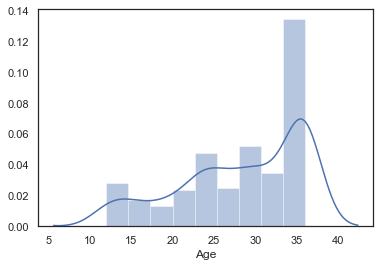

In [60]:
sns.distplot(df.Age)